In [1]:
%pylab inline
plt.style.use('dark_background')
pylab.rcParams['figure.figsize'] = (10.0, 6.0)

Populating the interactive namespace from numpy and matplotlib


# Trajectory functions

In [110]:
def point_to_point_traj(x1, x2, v1, v2, delta_t):
  t = np.linspace(0, delta_t, 100)  
  a0 = x1
  a1 = v1
  a2 = (3*x2 - 3*x1 - 2*v1*delta_t - v2 * delta_t) / (delta_t**2)
  a3 = (2*x1 + (v1 + v2) * delta_t  - 2 * x2) / (delta_t**3)

  polynomial = a0 + a1 * t + a2 * t**2 + a3 * t**3
  derivative = a1 + 2*a2 * t + 3 * a3 * t**2
  return polynomial, derivative


def piecewise2D (X,Y, Vx, Vy, T):
    theta_x, theta_y, dx, dy = [], [], [], []

    for i in range(len(P)-1):          
        theta_xi, dxi = point_to_point_traj(X[i], X[i+1], Vx[i], Vx[i+1], T[i+1] - T[i])
        theta_yi, dyi = point_to_point_traj(Y[i], Y[i+1], Vy[i], Vy[i+1], T[i+1] - T[i])
#         print(theta_xi)
#         print(dxi)
#         print(theta_yi)
#         print(dyi)
        theta_x += theta_xi.tolist()
        theta_y += theta_yi.tolist()
        dx += dxi.tolist()
        dy += dyi.tolist()

#         plot(theta_xi, theta_yi)
    return theta_x, theta_y, dx, dy

# Plotting functions

In [111]:
# Plotting
def plot_points():
    plot(X,Y, '--')
    plot(X,Y, 'o')
    quiver(X,Y, Vx, Vy, color='r')
    
# Speed
def plot_speed():
    speed = np.sqrt(np.array(dx)**2 + np.array(dy)**2)
    plot(speed)

# Example 1

In [115]:
##### Requirements for the trajectory

# Waypoints
p1 = [-5.,-7]
p2 = [-9,-7]
p3 = [-9,6]
p4 = [3,6]
p5 = [3,0]
p6 = [-1,0]
p7 = [-1,10]
pf = [9,10]

# Velocities
v1 = [0,0]
v2 = [0,13]
v3 = [12,0]
v4 = [0,-6]
v5 = [-4,0]
v6 = [0, 10]
v7 = [5,0]
vf = [0,-0]


# v1 = [0,-0.001]
# v2 = [1,1]
# v3 = [1,0]
# v4 = [1,1]
# v5 = [0,-0.001]


# Time
t1 = 0
t2 = 1
t3 = 2
t4 = 3
t5 = 4
t6 = 5
t7 = 6
t8 = 7

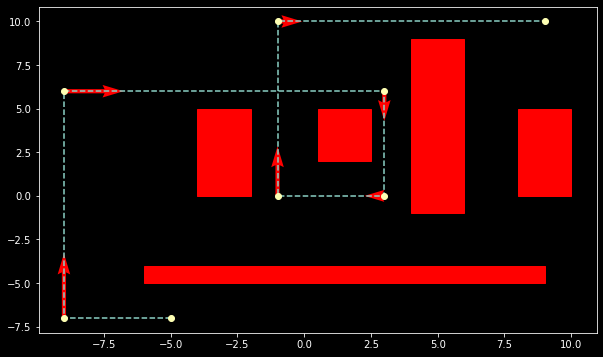

In [116]:
import matplotlib.patches as patches
import matplotlib.pyplot as plt
fig,ax = plt.subplots(1)
# Convert the initial conditions to a vector form
P = np.vstack((p1, p2, p3, p4, p5,p6, p7, pf))
V = np.vstack((v1, v2, v3, v4, v5,v6,v7, vf))
T = [t1, t2, t3, t4, t5, t6, t7, t8]

X, Y = P[:,0], P[:,1]
Vx, Vy = V[:,0], V[:,1]


plot_points()
rect1 = patches.Rectangle((-6,-5), 15, 1, color = "red")
rect2 = patches.Rectangle((-4,0), 2, 5, color = "red")
rect3 = patches.Rectangle((.5,2), 2, 3, color = "red")
rect4 = patches.Rectangle((4,-1), 2, 10, color = "red")
rect5 = patches.Rectangle((8,0), 2, 5, color = "red")


ax.add_patch(rect1)
ax.add_patch(rect2)
ax.add_patch(rect3)
ax.add_patch(rect4)
ax.add_patch(rect5)





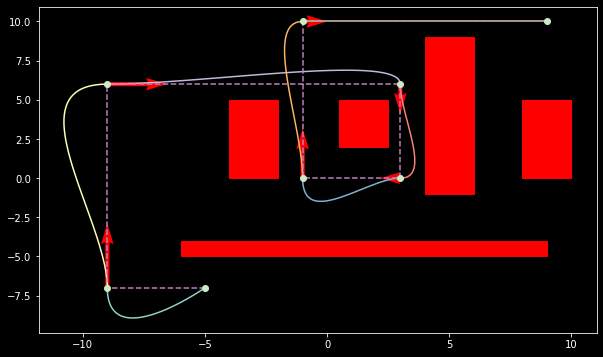

In [117]:
# Plot the trajectory that passes trhough the desired waypoints
fig,ax = plt.subplots(1)
theta_x, theta_y, dx, dy = piecewise2D(X,Y, Vx, Vy, T)

plot_points()
rect1 = patches.Rectangle((-6,-5), 15, 1, color = "red")
rect2 = patches.Rectangle((-4,0), 2, 5, color = "red")
rect3 = patches.Rectangle((.5,2), 2, 3, color = "red")
rect4 = patches.Rectangle((4,-1), 2, 10, color = "red")
rect5 = patches.Rectangle((8,0), 2, 5, color = "red")


ax.add_patch(rect1)
ax.add_patch(rect2)
ax.add_patch(rect3)
ax.add_patch(rect4)
ax.add_patch(rect5)

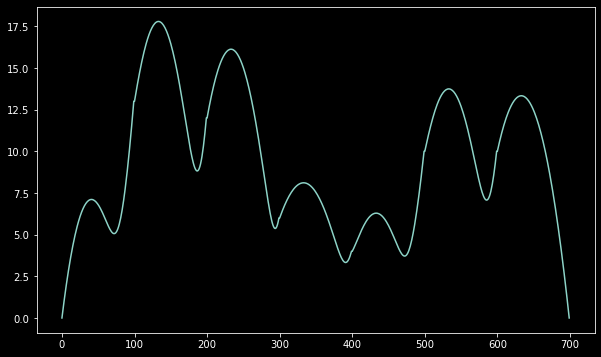

In [109]:
# Plot speed
plot_speed()

# Example 2

In [ ]:
##### Requirements for the trajectory

# Waypoints
p1 = [5.,0]
p2 = [10, 0]
p3 = [15,2.5]
p4 = [10,5]
p5 = [0,5]
p6 = [-5,2.5]
p7 = [0,0]
p8 = [5,0]

# Velocities
v1 = [0.0001,0.]
v2 = [1,0]
v3 = [0,1]
v4 = [-1,0]
v5 = [-1,0]
v6 = [0,-1]
v7 = [1,0]
v8 = [0.0001,0]

# Time
t1 = 0
t2 = t1 + 3
t3 = t2 + 5
t4 = t3 + 5
t5 = t4 + 3
t6 = t5 + 5
t7 = t6 + 5
t8 = t7 + 2


# Grouping
P = np.vstack((p1, p2, p3, p4, p5, p6, p7, p8))
V = np.vstack((v1, v2, v3, v4, v5, v6, v7, v8))
T = [t1, t2, t3, t4, t5, t6, t7, t8]

X, Y = P[:,0], P[:,1]
Vx, Vy = V[:,0], V[:,1]

# Plotting
plot_points()
show()

# Piecewise function
theta_x, theta_y, dx, dy = piecewise2D(X,Y, Vx, Vy, T)

# Plotting
quiver(X,Y, Vx, Vy, color='r')  #

show()
plot_speed()

# Moving the point in time
Be sure that you have JSAnimation installed. If not pip install JSAnimation

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import animation
from JSAnimation import IPython_display    
from IPython.display import HTML
    


fig, ax = plt.subplots()

def animate(t):
    ax.clear()
    
    # Path
    ax.plot(theta_x, theta_y, 'b--')
    
    # Initial conditions
    ax.plot(X,Y, 'go')
    ax.quiver(X,Y, Vx, Vy, color='0.4', scale=20)
        
    # Dynamic position
    ax.plot(theta_x[t], theta_y[t], 'ro', markersize=10)
       
    # Velocity vector
    ax.quiver([theta_x[t]], [theta_y[t]], [dx[t]], [dy[t]], color='r', units='xy', scale=10/np.linalg.norm([theta_x[t], theta_y[t]]))
    

anim = animation.FuncAnimation(fig, animate, frames=int(len(theta_x)/1), interval=25)


HTML(anim.to_jshtml())

In [ ]:
# Export the movie to mp4
Be sure that you have the ffmpeg codec installed (sudo apt-get install ffmpeg).

In [ ]:
anim.save('trajectory2.mp4', dpi=300)